## Nursing Homes Across US

In this script, we are retreiving data regarding the Nursing Home Providers in United States. 
This contains functions to read the data, clean up the data and extract the information required for the analysis. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import requests
pd.set_option('mode.chained_assignment', None)

### Data Retrieval and clean up

In [14]:
def getCleanProviderInfo():   # Reads data from ProviderInfo.csv, cleans it 
    # Read the input data
    getprovdata = pd.read_csv("../Resources/ProviderInfo.csv")
    providerinfo_data = getprovdata[['PROVNUM', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'County_name', 'Overall_Rating', 'BEDCERT', 'RESTOT']]
    providerinfo_data.rename(columns={
        'PROVNUM' : "Prov No", 
        'PROVNAME' : 'Prov Name', 
        'ADDRESS' : 'Address',
        'CITY' : 'City',
        'STATE' : 'State',
        'ZIP': 'Zip',
        'County_name' : 'County',
        'Overall_Rating' : 'Overall Rating',
        'BEDCERT' : 'No of cert beds', 
        'RESTOT': 'Avg no of residents per day'}, inplace=True)
    providerinfo_data.drop(providerinfo_data[providerinfo_data['Overall Rating'].isnull()].index, inplace = True)
    return (providerinfo_data)
#providerinfo_data

In [15]:
provider_df = getCleanProviderInfo()
provider_df

Prov No                                         Prov Name  \
0      015009                          BURNS NURSING HOME, INC.   
1      015010                    COOSA VALLEY HEALTHCARE CENTER   
2      015012                        HIGHLANDS HEALTH AND REHAB   
3      015014       EASTVIEW REHABILITATION & HEALTHCARE CENTER   
4      015015                     PLANTATION MANOR NURSING HOME   
...       ...                                               ...   
15396  676456                   THE MEDICAL RESORT AT WOODLANDS   
15397  676457  THE BARTLETT SKILLED NURSING AND ASSISTED LIVING   
15398  676458                               MABANK NURSING HOME   
15399  676459                  SEDONA TRACE HEALTH AND WELLNESS   
15404  676464     LAS BRISAS REHABILITATION AND WELLNESS SUITES   

                                        Address          City State    Zip  \
0                          701 MONROE STREET NW  RUSSELLVILLE    AL  35653   
1                        260 WEST WALNUT STREET     SYLACAUGA    AL  35150   
2                           380 WOODS COVE ROAD    SCOTTSBORO    AL  35768   
3                      7755 FOURTH AVENUE SOUTH    BIRMINGHAM    AL  35206   
4      6450 OLD TUSCALOOSA HIGHWAY   P O BOX 97      MC CALLA    AL  35111   
...                                         ...           ...   ...    ...   
15396                24854 CATHEDRAL LAKES PKWY        SPRING    TX  77386   
15397                        221 BARTLETT DRIVE       EL PASO    TX  79912   
15398                              110 W TROUPE        MABANK    TX  75147   
15399                         8324 CAMERON ROAD        AUSTIN    TX  78754   
15404                           3421 W STORY RD        IRVING    TX  75038   

           County  Overall Rating  No of cert beds  \
0        Franklin             5.0               57   
1       Talladega             4.0               85   
2         Jackson             3.0               50   
3       Jefferson             3.0               92   
4       Jefferson             4.0              103   
...           ...             ...              ...   
15396  Montgomery             4.0               90   
15397     El Paso             3.0               58   
15398     Kaufman             4.0               60   
15399      Travis             4.0               73   
15404      Dallas             2.0              128   

       Avg no of residents per day  
0                             50.1  
1                             74.8  
2                             46.9  
3                             82.8  
4                             95.5  
...                            ...  
15396                         33.0  
15397                         53.7  
15398                         38.8  
15399                        101.3  
15404                         53.7  

[15229 rows x 10 columns]

In [16]:
def drawBar_CountAllStates(provider_df):
    prov_groupby_state = provider_df.groupby("State")['Prov Name'].count().reset_index(name="count by state")
    prov_groupby_state = prov_groupby_state.sort_values('count by state', ascending=False)
    x_values = prov_groupby_state['State']
    y_values = prov_groupby_state['count by state']
    plt.figure(figsize=(32,12))
    plt.bar(x_values, y_values) 
    plt.title("Nursing Homes Count in United States", fontsize=24)
    plt.xlabel("States", fontsize=20)
    plt.ylabel("Number of Nursing Homes", fontsize=20)
    plt.style.use('seaborn')    
    plt.show()   


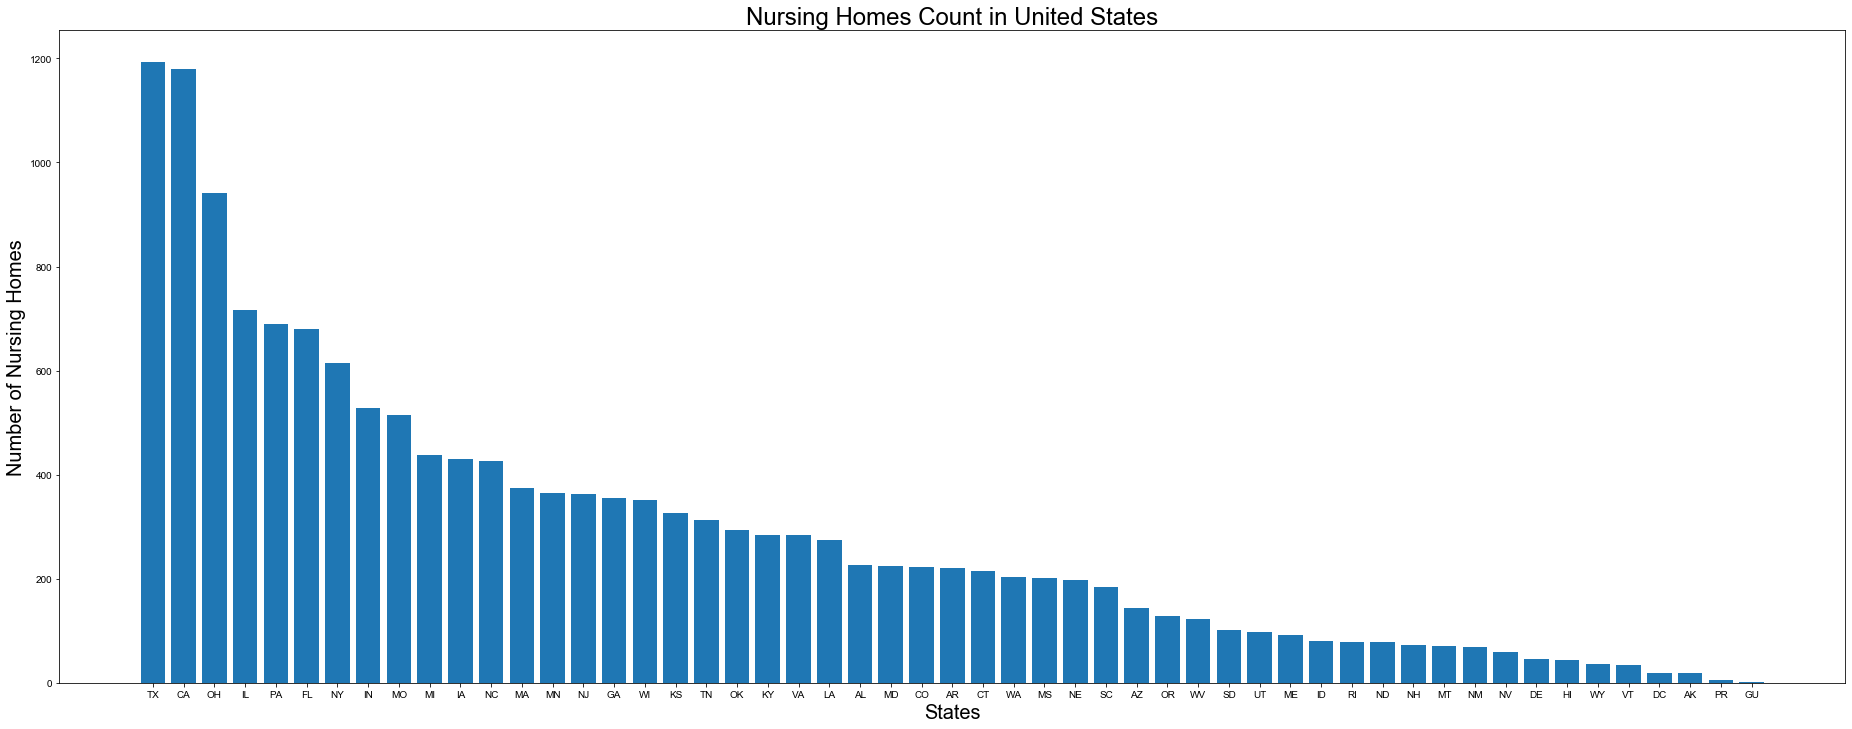

In [17]:
df1=drawBar_CountAllStates(provider_df)


###### Get the top ten best rated nursing homes in US

In [19]:
def getToptenNames(provider_df):
    # Group the providers by state and get the count of providers
    prov_statewise_count = provider_df.groupby(["State"])['Prov Name'].count().reset_index(name="Total")

    # Retrieve the providers from the above dataset with ratings 4 & above
    prov_toprated_df = provider_df.loc[provider_df['Overall Rating']>=4]

    # Get the total count of providers by state with ratings 4 & 5
    prov_best_rated_df = prov_toprated_df.groupby('State')['Prov Name'].count().reset_index(name="Top Rated Total")

    # Merge the above two datasets and calculate the percentage of providers whaih are best rated per state
    merge_df = pd.merge(prov_best_rated_df, prov_statewise_count, on="State")
    merge_df["Percentage"] = (merge_df['Top Rated Total']/merge_df['Total'])*100

    # Sort the dataset in descending order of the total count so as to find the top ten best rated nursing homes/providers
    merge_df_sorted = merge_df.sort_values(["Total", "Top Rated Total"], ascending = False)

    # Extract the top ten nursing homes
    prov_topten_nh = merge_df_sorted.head(10).reset_index(drop=True)
    prov_topten_nh   
    # Return the top ten best rated nursing homes
    return (prov_topten_nh)

In [21]:
df2=getToptenNames(provider_df)
df2

State  Top Rated Total  Total  Percentage
0    TX              342   1194   28.643216
1    CA              611   1179   51.823579
2    OH              410    942   43.524416
3    IL              301    717   41.980474
4    PA              326    690   47.246377
5    FL              363    680   53.382353
6    NY              297    615   48.292683
7    IN              223    529   42.155009
8    MO              210    514   40.856031
9    MI              233    438   53.196347

In [ ]:
# def drawBar_TopTenAllStates(provider_info):
#     # Retrieve the data fro the top ten providers
#     nh_rated_topten = getToptenNames(provider_info)        
#     nh_rated_topten.plot(x='State',  y=["Total", "Top Rated Total"], kind='bar', stacked=True)
#     plt.xlabel("States")
#     plt.ylabel("Number of Nursing Homes")
#     plt.legend(["Total Nursing Homes", "Best Rated Nursing Homes"])
#     plt.style.use('bmh')
#     plt.show()

##### Get the Best Rated Nursing homes in Pennsylvania

In [ ]:
def getProvidersBestRatedinPA():
    provider_df = getCleanProviderInfo()
    prov_pennstate = provider_df.loc[provider_df['State']=='PA',['Prov Name','County','Overall Rating']].copy()
    prov_bestrated_in_PA = prov_pennstate.loc[prov_pennstate['Overall Rating']>=4]
    prov_bestrated_in_PA.sort_values('Overall Rating',ascending=False, inplace=True)
    prov_bestrated_in_PA.reset_index(drop=True, inplace=True)
    prov_bestrated_in_PA
    return (prov_bestrated_in_PA)

In [ ]:
df=getProvidersBestRatedinPA()
df


##### Get the Least Rated Nursing homes in Pennsylvania

In [ ]:
#def getProvidersLowRatedinPA():
provider_df = getCleanProviderInfo()
prov_pennstate = provider_df.loc[provider_df['State']=='PA'] [['Prov Name','County','Overall Rating']]
prov_lowrated_in_PA = prov_pennstate.loc[prov_pennstate['Overall Rating']<=3]
prov_lowrated_in_PA.sort_values('Overall Rating',ascending=False, inplace=True)
prov_lowrated_in_PA.reset_index(drop=True, inplace=True)
prov_lowrated_in_PA
   # return (prov_lowrated_in_PA)

##### Get the Quality Ratings by Category

In [ ]:
# Analyse how the various ratings contirbute to the nursing home quality rating
def getProviderRatings():
    getprovdata = pd.read_csv("../Resources/ProviderInfo.csv")

    # Retrieve the different ratings for the nursing homes
    provider_ratings = getprovdata[['Overall_Rating', 'SURVEY_RATING', 'Quality_Rating', 'LS_Quality_Rating', 
                                     'SS_Quality_Rating', 'Staffing_Rating', 'RN_staffing_rating']]

    # Check if there are null values for the ratings
    provider_ratings[provider_ratings['Quality_Rating'].isnull()]
    
    # Drop the null values from the dataset
    provider_ratings = provider_ratings.dropna(axis=0)
    return (provider_ratings)

In [ ]:
# def drawOverallvsOtherRatings():
#     providerinfo_data = getProviderRatings()
#     groupby_rating = providerinfo_data.groupby('Overall_Rating').mean().reset_index()
#     groupby_rating

#     x_axis = groupby_rating['Overall_Rating']

#     y_axis_1 = groupby_rating['SURVEY_RATING']
#     y_axis_2 = groupby_rating['Quality_Rating']
#     y_axis_3 = groupby_rating['Staffing_Rating']
#     y_axis_4 = groupby_rating['RN_staffing_rating']
#     y_axis_5 = groupby_rating['LS_Quality_Rating']
#     y_axis_6 = groupby_rating['SS_Quality_Rating']

#     ratings = ["Survey Rating", "Quality Rating", "Staffing_Rating", "RN_staffing_rating", 'LS_Quality_Rating', 'SS_Quality_Rating']

#     plt.plot(x_axis, y_axis_1, linewidth=1, marker="o", color="r")
#     plt.plot(x_axis, y_axis_2, linewidth=1, marker="s", color="g")
#     plt.plot(x_axis, y_axis_3, linewidth=1, marker="*", color="b")
#     plt.plot(x_axis, y_axis_4, linewidth=1, marker="^", color="y")
#     plt.plot(x_axis, y_axis_5, linewidth=1, marker="^", color="m")
#     plt.plot(x_axis, y_axis_6, linewidth=1, marker="^", color="c")
#     plt.xlabel("Overall Ratings")
#     plt.ylabel("Other Rating")
#     plt.legend(ratings)
#     plt.style.use('bmh')
#     plt.show()